In [1]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#import data set and clean up
charity = pd.read_csv('Charity.csv')
dummies = pd.get_dummies(charity.RenewalsOrAcq)
charity = pd.concat([charity, dummies], axis=1)
charity.drop(['Renewals'], inplace=True, axis=1)
charity.drop(['dob'], inplace=True, axis=1)
charity.drop(['RenewalsOrAcq'], inplace=True, axis=1)
charity.drop(['suburb'], inplace=True, axis=1)
charity.drop(['state'], inplace=True, axis=1)
charity = charity.dropna(subset=['age'])
charity['age'] = charity['age'].convert_objects(convert_numeric=True)
charity = charity.dropna(subset=['age'])
charity['postcode'] = charity['postcode'].astype(str)
charity.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,postcode,num_streets,collection_amount,donation_amount,total_received,age,weekends,profitable,Acq
0,801,2,315.00,0,315.00,72,4,1,0
1,801,6,303.55,0,303.55,65,4,1,1
2,804,4,250.00,0,250.00,80,4,1,0
3,804,2,28.60,50,78.60,57,4,1,0
5,810,2,521.50,0,521.50,67,4,1,1


In [3]:
#have a look at the data
charity.describe(include='all')

,postcode,num_streets,collection_amount,donation_amount,total_received,age,weekends,profitable,Acq
count,26597,26597.000000,26597.000000,26597.000000,26597.000000,26597.000000,26597.000000,26597.000000,26597.000000
unique,1772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.881716,77.967018,3.738053,81.705071,62.471858,3.352859,0.414107,0.613979
std,NaN,2.548462,71.066831,18.735377,70.878127,14.066151,0.870711,0.492576,0.486845
min,NaN,0.000000,-414.950000,-150.000000,-500.000000,0.000000,2.000000,0.000000,0.000000
25%,NaN,1.000000,37.000000,0.000000,40.000000,54.000000,2.000000,0.000000,0.000000
50%,NaN,2.000000,61.000000,0.000000,64.000000,65.000000,4.000000,0.000000,1.000000
75%,NaN,3.000000,100.000000,0.000000,101.300000,72.000000,4.000000,1.000000,1.000000


In [4]:
#look for any correlations
charity.corr()

,num_streets,collection_amount,donation_amount,total_received,age,weekends,profitable,Acq
num_streets,1.000000,-0.020782,-0.011124,-0.023778,-0.005437,0.020047,-0.034242,0.058324
collection_amount,-0.020782,1.000000,-0.141874,0.965161,0.176009,0.091123,0.631454,-0.174396
donation_amount,-0.011124,-0.141874,1.000000,0.122081,0.041046,0.046338,0.061930,0.032654
total_received,-0.023778,0.965161,0.122081,1.000000,0.187327,0.103615,0.649506,-0.166229
age,-0.005437,0.176009,0.041046,0.187327,1.000000,0.124830,0.186369,-0.117583
weekends,0.020047,0.091123,0.046338,0.103615,0.124830,1.000000,0.107270,-0.054035
profitable,-0.034242,0.631454,0.061930,0.649506,0.186369,0.107270,1.000000,-0.153555
Acq,0.058324,-0.174396,0.032654,-0.166229,-0.117583,-0.054035,-0.153555,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11496c510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a7458d0>]], dtype=object)

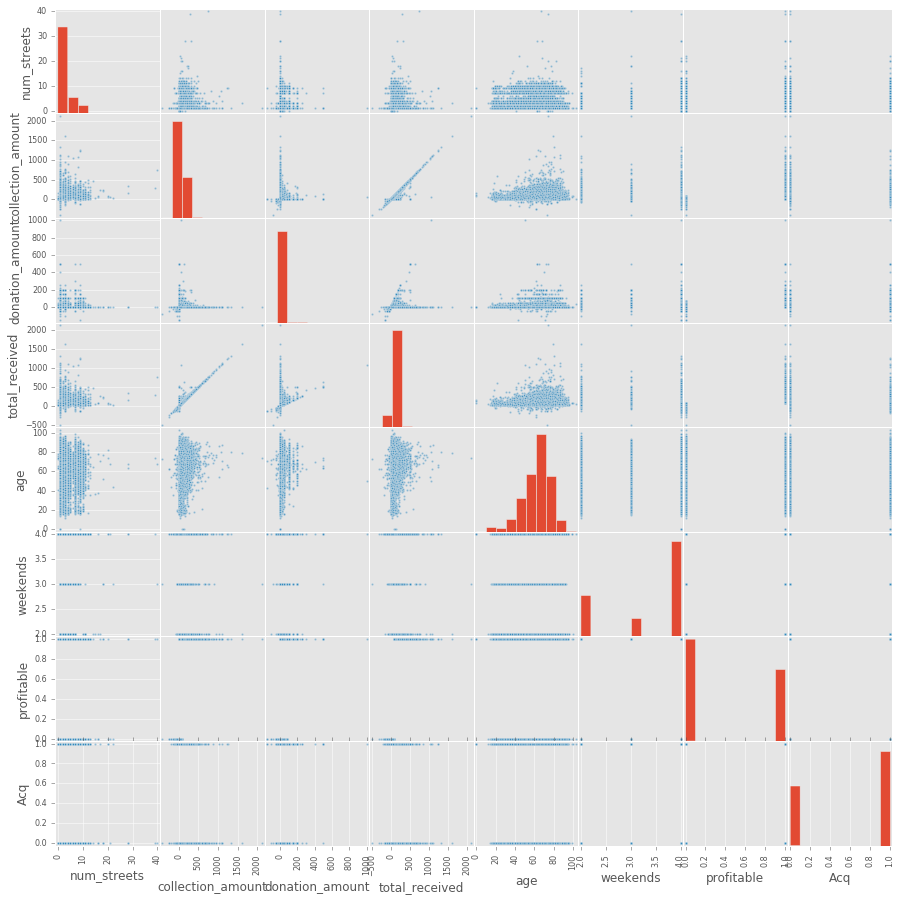

In [5]:
#create scatter matrix
pd.scatter_matrix(charity, figsize=(15,15))

In [6]:
# create a fitted model in one line
import statsmodels.formula.api as smf
lm = smf.ols(formula='total_received ~ age + num_streets', data=charity).fit()

# print the coefficients
lm.params

Intercept      24.599394
age             0.943302
num_streets    -0.633013
dtype: float64

In [7]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_received   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     491.0
Date:                Mon, 23 May 2016   Prob (F-statistic):          4.08e-210
Time:                        13:23:26   Log-Likelihood:            -1.5059e+05
No. Observations:               26597   AIC:                         3.012e+05
Df Residuals:                   26594   BIC:                         3.012e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      24.5994      2.005     12.271      0.000        20.670    28.529
age             0.9433      0.030     31.087      0.000         0.884     1.003
num_streets    -0.6330      0.167     -3.780      0.000        -0.961    -0.305
==============================================================================
Omnibus:                    28073.110   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5391253.213
Skew:                           4.946   Prob(JB):                         0.00
Kurtosis:                      72.043   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Let's try just the total collected
# create a fitted model in one line
lm = smf.ols(formula='total_received ~ collection_amount ', data=charity).fit()

# print the coefficients
lm.params

Intercept            6.654197
collection_amount    0.962598
dtype: float64

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_received   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.619e+05
Date:                Mon, 23 May 2016   Prob (F-statistic):               0.00
Time:                        13:23:28   Log-Likelihood:            -1.1541e+05
No. Observations:               26597   AIC:                         2.308e+05
Df Residuals:                   26595   BIC:                         2.308e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             6.6542      0.169     39.417      0.000         6.323     6.985
collection_amount     0.9626      0.002    601.540      0.000         0.959     0.966
==============================================================================
Omnibus:                    50198.576   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        225855372.228
Skew:                          14.109   Prob(JB):                         0.00
Kurtosis:                     453.562   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

feature_cols = ['age', 'num_streets', 'weekends', 'Acq', 'postcode']
X = charity[feature_cols]
y = charity.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)


0.0637056411947


In [11]:
#add in ATO data and see if I can improve my model
tax = pd.read_csv('2014tax2.csv')
tax['postcode'] = tax['postcode'].astype(str)
charity_new = pd.merge(charity, tax, on='postcode')
charity_new.head()
print charity_new.columns



Index([u'postcode', u'num_streets', u'collection_amount', u'donation_amount',
       u'total_received', u'age', u'weekends', u'profitable', u'Acq',
       u'tax individuals', u'avg tax income', u'avg gross tax paid',
       u'avg net tax paid', u'avg salary', u'no pensions', u'avg pension',
       u'avg income', u'no donations', u'value donations',
       u'avg donation value'],
      dtype='object')


In [12]:
feature_cols = ['age', 'Acq', 'postcode', 'avg donation value', 'no donations', 'avg tax income']
X = charity_new[feature_cols]
y = charity_new.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)

0.0993599548147


In [13]:
#lm = sm.OLS(y, X).fit()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1207ef250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1377ab9d0>]], dtype=object)

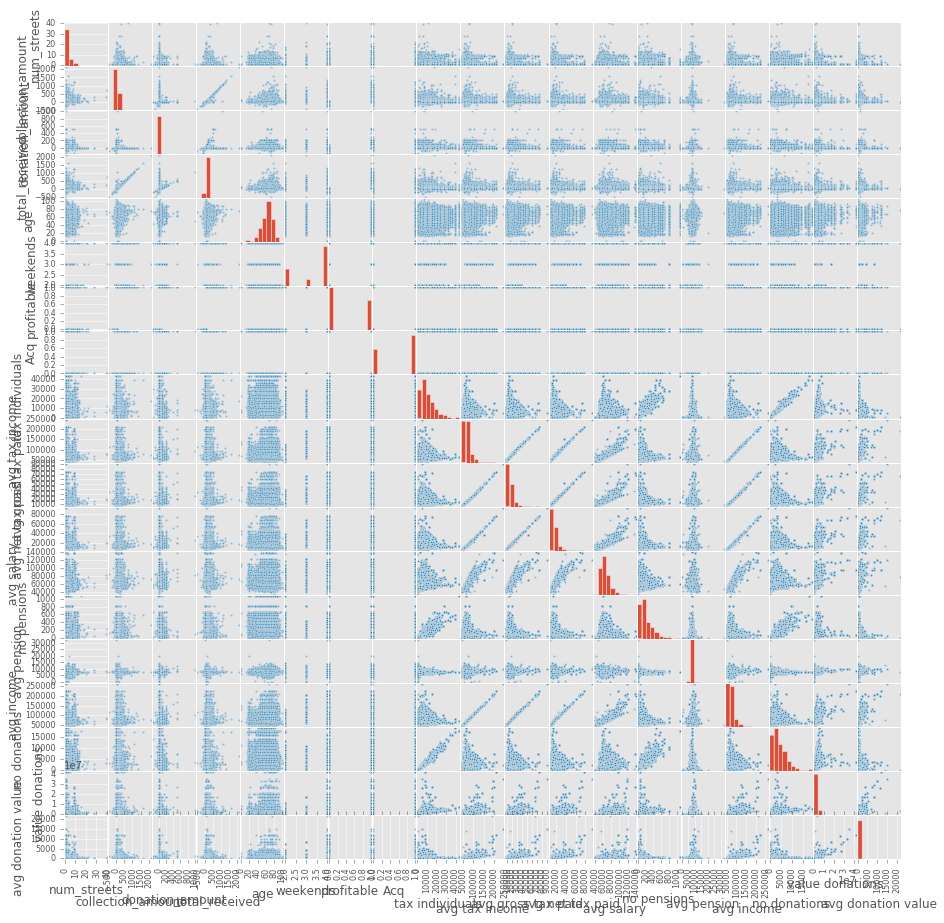

In [14]:
#create scatter matrix
pd.scatter_matrix(charity_new, figsize=(15,15))

In [15]:
#X = charity_new.filter(regex="[^total_received|^collection_amount|^donation_amount]")
X = charity_new.filter(regex="[^total_received|^collection_amount]")
y = charity_new.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)

0.472592725258


In [17]:
from sklearn import linear_model

# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((linreg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linreg.score(X_test, y_test))


('Coefficients: \n', array([ -2.27185989e-03,   4.32367926e-01,   3.13177569e-01,
         1.00127266e+00,   8.88110909e+01,  -9.37088166e+00,
         7.00475527e-04,   4.04466367e-03,  -1.92888479e-03,
        -5.45882729e-04,  -2.99608757e-04,  -1.61940140e-02,
        -2.32271707e-04,  -2.58156717e-03,  -1.13393300e-03,
         7.45093758e-07,  -4.32384049e-05]))
Residual sum of squares: 2389.83
Variance score: 0.47


In [18]:
# evaluate the model using 10-fold cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, scoring='r2', cv=100)
print scores
print scores.mean()

[ 0.27134836  0.21489664  0.32595954  0.50370672  0.32126468  0.42573186
  0.44287837  0.40401326  0.39773902  0.59173149  0.47188558  0.38615734
  0.54803215  0.2617764   0.52788193  0.51615891  0.55439908  0.49287329
  0.60971508  0.36998696  0.35477569  0.40473936  0.31555013  0.54677418
  0.47050868  0.45984345  0.46482962  0.32341368  0.52344958  0.39658804
  0.59150096  0.4729506   0.37181035  0.56365771  0.4513099   0.44304703
  0.32448468  0.4781518   0.52907835  0.55594787  0.61619072  0.43383754
  0.64296872  0.50889232  0.51571089  0.42548088  0.6130961   0.39239007
  0.52346111  0.49946409  0.37006117  0.59690388  0.56928407  0.30652363
  0.53811425  0.5068516   0.32546053  0.58980539  0.59475166  0.52458959
  0.35585534  0.41739293  0.59988046  0.63454752  0.50378894  0.44190973
  0.50826763  0.54218706  0.16771785  0.47972135  0.38962583  0.46411032
  0.2679297   0.50102674  0.48848727  0.48679834  0.52525626  0.58185612
  0.49964881  0.59260152  0.37756765  0.45459885  0

In [19]:
#this is heaaaaps better - linear regression improving..

In [20]:
# evaluate the model using 10-fold cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, scoring='mean_squared_error', cv=100)
print scores
print scores.mean()
print 'RMSE =', np.sqrt(metrics.mean_squared_error(y_test, y_pred_class))


[ -9470.85930168 -12915.77423451  -7013.70961348  -2091.85890505
  -7793.59569912  -3291.33090594  -3835.60709834  -4172.56502712
  -3711.64683119  -1624.95280636  -2648.71596457  -3360.97963753
  -1630.32432317  -4771.88702155  -2374.07181897  -2266.21728571
  -1420.24934487  -2308.03515688  -1239.46660226  -5575.54866171
  -4620.88481648  -2727.95824481  -6687.50960429  -1730.89241481
  -2776.09593894  -2926.19413151  -2189.82902529  -4042.51483021
  -1592.3719909   -3535.09028934  -1708.32944616  -1787.4728799
  -4108.00020579  -1352.11183379  -2474.65366774  -2320.78775962
  -5281.59418989  -2497.11119476  -1515.31578847  -1990.27735094
  -1012.69650585  -2533.19902463  -1076.88725484  -1893.96758464
  -2329.51520738  -3233.58667091   -882.628531    -2056.98549311
  -1923.0782132   -1523.79461173  -2160.71032121   -667.99593878
   -755.82106557  -4122.43317335  -1798.21518869  -1336.78920597
  -4419.67604175   -790.63351774   -905.50009081   -788.31230975
  -2129.85595374  -2838.00

In [22]:
# add in the abs data and see if it improves
burs = pd.read_csv('abs2011combo.csv')
burs['postcode'] = charity_new['postcode'].astype(str)
charity_plus = pd.merge(charity_new, burs, on='postcode')
charity_plus.head()
print charity_plus.columns

Index([u'postcode', u'num_streets', u'collection_amount', u'donation_amount',
       u'total_received', u'age', u'weekends', u'profitable', u'Acq',
       u'tax individuals',
       ...
       u'ID_NS_OcMngr', u'ID_NS_OcProf', u'ID_NS_OcTechTrdW',
       u'ID_NS_OcComPerS', u'ID_NS_OcClericAdm', u'ID_NS_OcSalesWk',
       u'ID_NS_OcMacOp_Driv', u'ID_NS_OcLab', u'ID_NS_OcID_NS', u'ID_NS_Tot'],
      dtype='object', length=1203)


In [31]:
X = charity_plus.filter(regex="[^total_received|^collection_amount|^profitable]")
y = charity_plus.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)
print 'RMSE =', np.sqrt(metrics.mean_squared_error(y_test, y_pred_class))

0.0596386131507
RMSE = 82.9345592335


In [27]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, scoring='mean_squared_error', cv=10)
print scores
print scores.mean()
print 'RMSE =', np.sqrt(metrics.mean_squared_error(y_test, y_pred_class))

KeyboardInterrupt: 

In [30]:
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-3, 7)
rregcv = RidgeCV(normalize=True, scoring='mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)
rregcv.alpha_
preds = rregcv.predict(X_test)
print 'RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))

RMSE (Ridge CV reg.) = 65.4542836219


In [ ]:
y = charity.array('total_received')
print y

In [ ]:
X = charity
#X.drop('total_received', axis=1, inplace=True)
#X.drop('collection_amount', axis=1, inplace=True)
#X.drop('donation_amount', axis=1, inplace=True)
#y = X.total_received()
X.describe(include='all')

In [ ]:
#PCA Analysis
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=1)
X_r = pca.fit_transform(X)

y = charity.total_received()

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')

In [ ]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
# generate some data to play with
#X, y = samples_generator.make_classification(
# n_informative=5, n_redundant=0, random_state=42)
# ANOVA SVM-C
#anova_filter = SelectKBest(f_regression, k=5)
#clf = svm.SVC(kernel='linear')
#anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
>>> # You can set the parameters using the names issued
>>> # For instance, fit using a k of 10 in the SelectKBest
>>> # and a parameter 'C' of the svm
>>> anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)
...                                              
Pipeline(steps=[...])
>>> prediction = anova_svm.predict(X)
>>> anova_svm.score(X, y)                        
0.77...
>>> # getting the selected features chosen by anova_filter
>>> anova_svm.named_steps['anova'].get_support()
... 
array([ True,  True,  True, False, False,  True, False,  True,  True, True,
       False, False,  True, False,  True, False, False, False, False,
       True], dtype=bool)